In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("part-00000-96fe28b2-db20-4ff9-976d-10159cf55857-c000.csv")

In [4]:
print(df.head())

                   host                      timestamp   tz method  \
0          199.72.81.55  1995-07-01T00:00:01.000+07:00 -400    GET   
1  unicomp6.unicomp.net  1995-07-01T00:00:06.000+07:00 -400    GET   
2        199.120.110.21  1995-07-01T00:00:09.000+07:00 -400    GET   
3    burger.letters.com  1995-07-01T00:00:11.000+07:00 -400    GET   
4        199.120.110.21  1995-07-01T00:00:11.000+07:00 -400    GET   

                                          resource  protocol  responsecode  \
0                                 /history/apollo/  HTTP/1.0           200   
1                              /shuttle/countdown/  HTTP/1.0           200   
2     /shuttle/missions/sts-73/mission-sts-73.html  HTTP/1.0           200   
3                  /shuttle/countdown/liftoff.html  HTTP/1.0           304   
4  /shuttle/missions/sts-73/sts-73-patch-small.gif  HTTP/1.0           200   

   bytes  ts_year  ts_month  ts_day  ts_hour  ts_minute  ts_sec  ts_dayOfWeek  \
0   6245     1995         7  

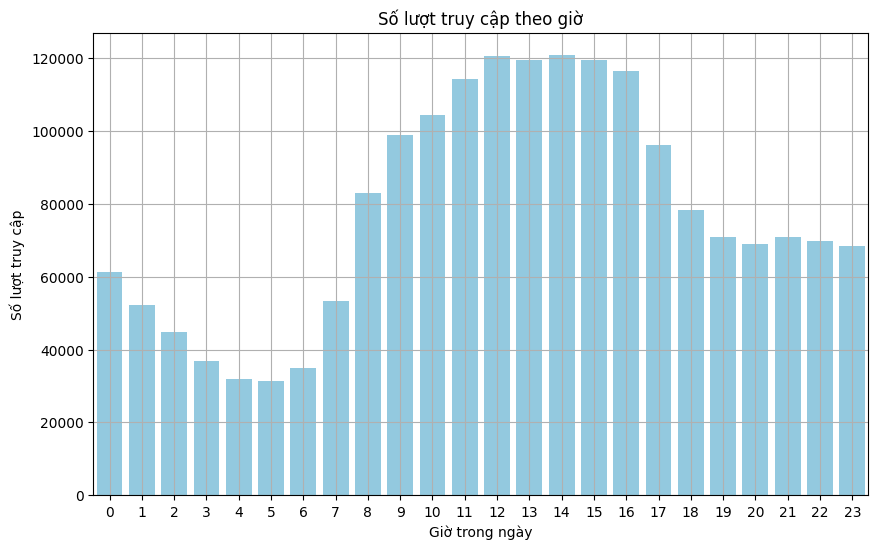

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển timestamp về dạng datetime nếu chưa
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Thêm cột giờ
df['hour'] = df['timestamp'].dt.hour

# Đếm truy cập theo giờ
hourly_counts = df['hour'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
plt.title("Số lượt truy cập theo giờ")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Số lượt truy cập")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


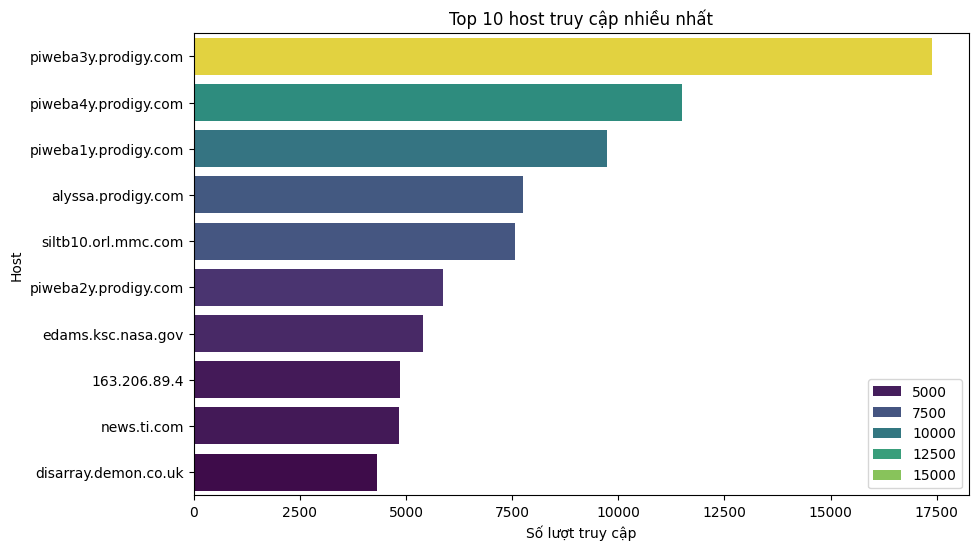

In [12]:
top_hosts = df['host'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.values,hue=top_hosts.values, y=top_hosts.index, palette="viridis")
plt.title("Top 10 host truy cập nhiều nhất")
plt.xlabel("Số lượt truy cập")
plt.ylabel("Host")
plt.show()


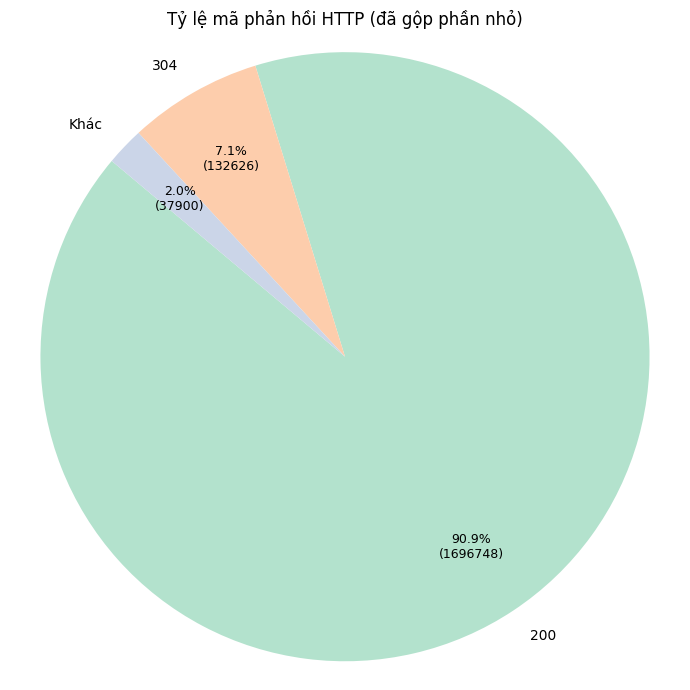

In [10]:
response_counts = df['responsecode'].value_counts()
total = response_counts.sum()
# Gộp những mã có tỷ lệ < 3% vào 'Khác'
threshold = 0.03
grouped = response_counts[response_counts / total >= threshold]
others = response_counts[response_counts / total < threshold].sum()
if others > 0:
    grouped['Khác'] = others
labels = grouped.index.astype(str)
sizes = grouped.values

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=make_autopct(sizes),
    startangle=140,
    colors=plt.cm.Pastel2.colors,
    labeldistance=1.1,
    pctdistance=0.75
)
for text in texts:
    text.set_size(10)
for autotext in autotexts:
    autotext.set_size(9)
plt.title("Tỷ lệ mã phản hồi HTTP (đã gộp phần nhỏ)")
plt.axis('equal')
plt.tight_layout()
plt.show()

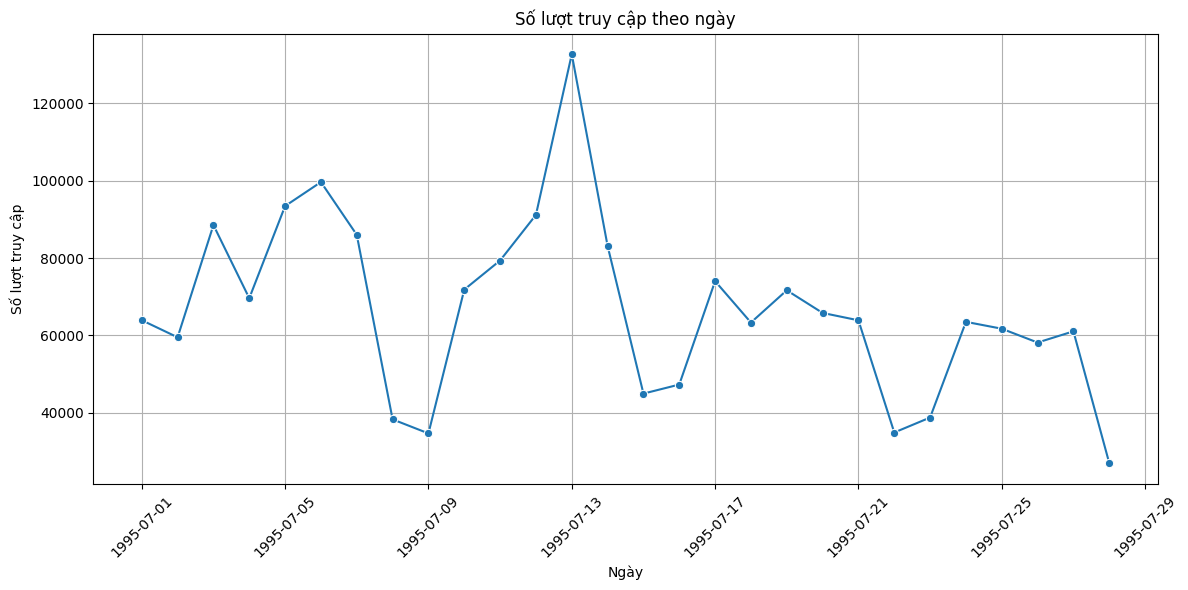

In [8]:
df['date'] = df['timestamp'].dt.date
daily_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.title("Số lượt truy cập theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Số lượt truy cập")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


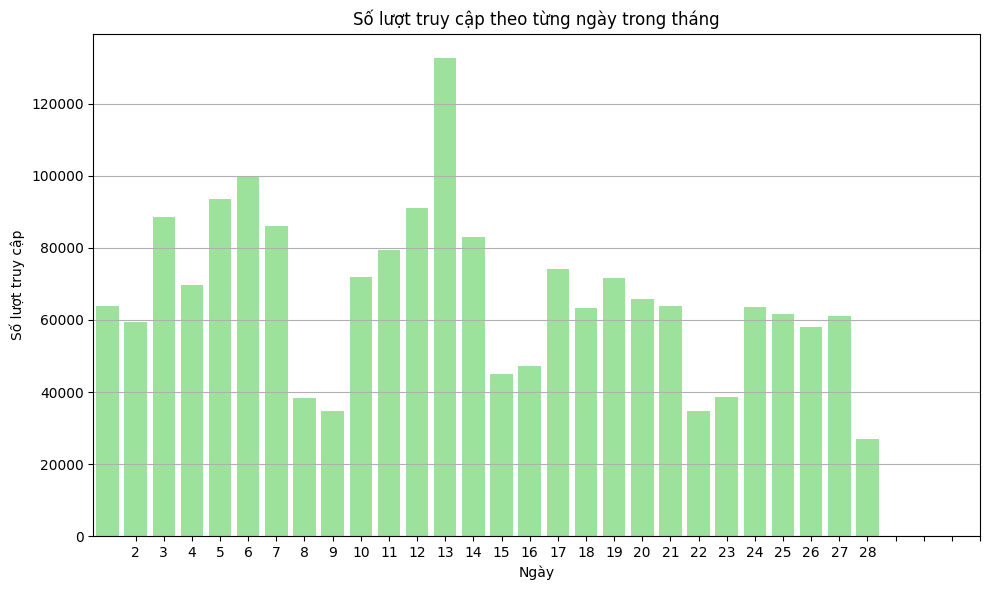

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo cột timestamp ở dạng datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Trích xuất ngày (trong tháng)
df['day'] = df['timestamp'].dt.day

# Đếm số lượt truy cập theo từng ngày
day_counts = df['day'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='lightgreen')
plt.title("Số lượt truy cập theo từng ngày trong tháng")
plt.xlabel("Ngày")
plt.ylabel("Số lượt truy cập")
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


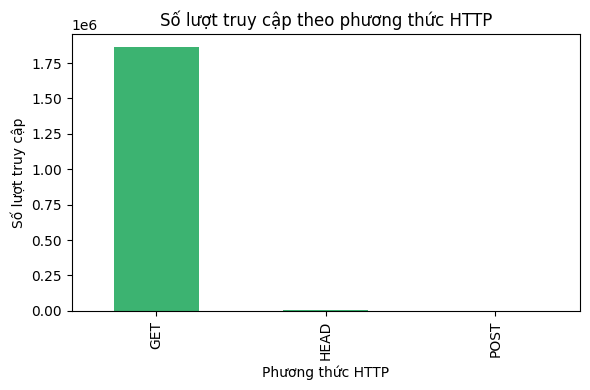

In [14]:
method_counts = df['method'].value_counts()

plt.figure(figsize=(6, 4))
method_counts.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Phương thức HTTP')
plt.ylabel('Số lượt truy cập')
plt.title('Số lượt truy cập theo phương thức HTTP')
plt.tight_layout()
plt.show()

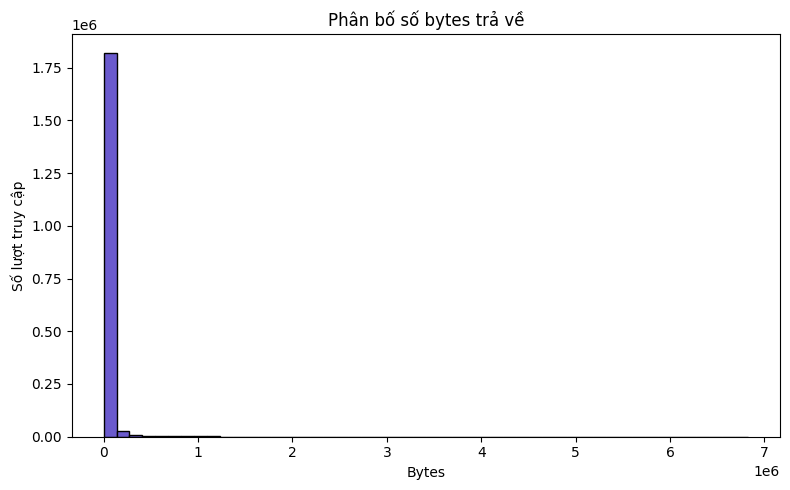

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['bytes'], bins=50, color='slateblue', edgecolor='black')
plt.xlabel('Bytes')
plt.ylabel('Số lượt truy cập')
plt.title('Phân bố số bytes trả về')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Bytes')

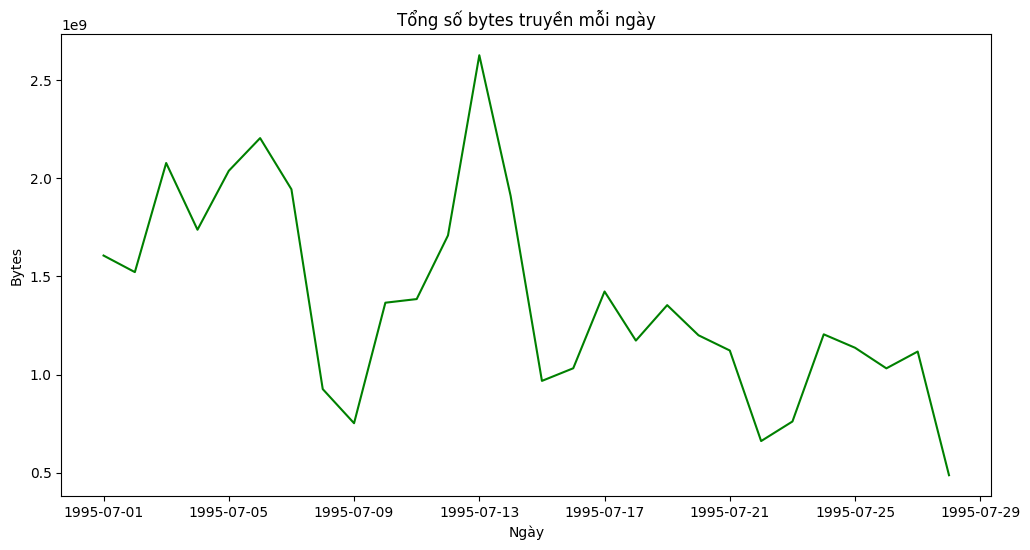

In [16]:
bytes_per_day = df.groupby('date')['bytes'].sum()

plt.figure(figsize=(12,6))
bytes_per_day.plot(kind='line', color='green')
plt.title("Tổng số bytes truyền mỗi ngày")
plt.xlabel("Ngày")
plt.ylabel("Bytes")

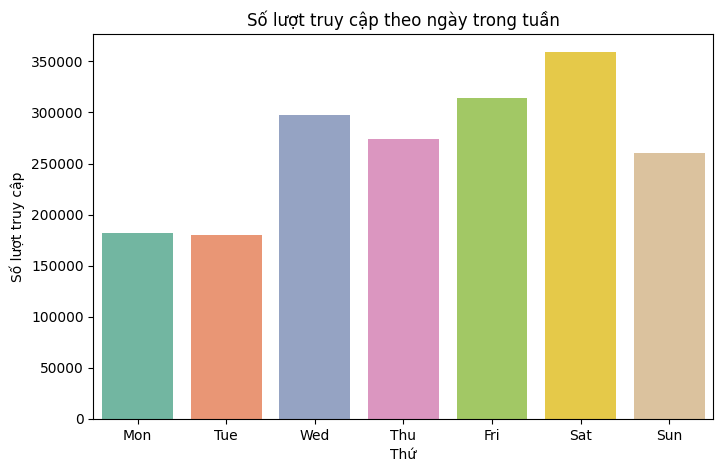

In [19]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['ts_dayOfWeek'].map(lambda x: day_names[x % 7])

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='day_name', hue='day_name', order=day_names, palette='Set2')
plt.title("Số lượt truy cập theo ngày trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Số lượt truy cập")
plt.show()

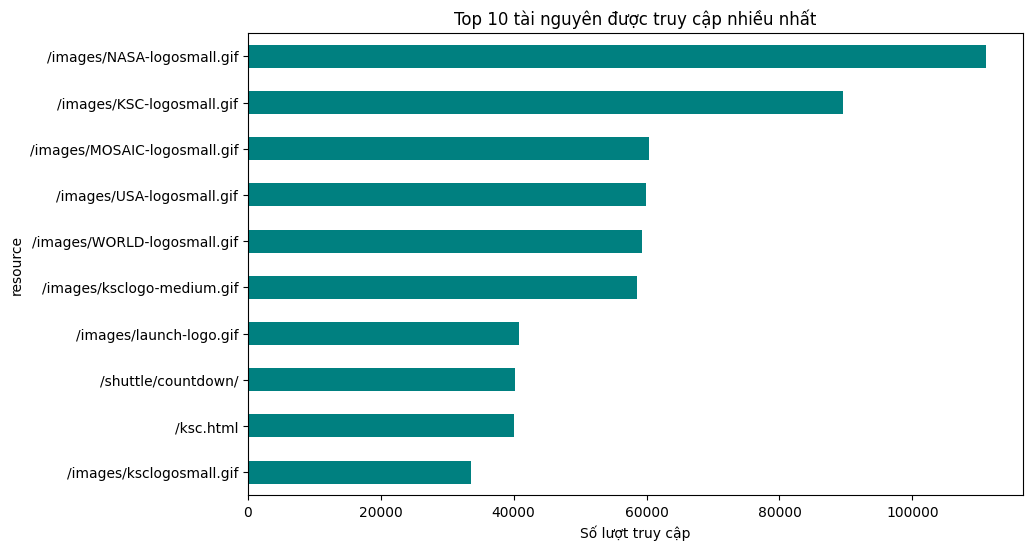

In [18]:
top_resources = df['resource'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_resources.plot(kind='barh', color='teal')
plt.title("Top 10 tài nguyên được truy cập nhiều nhất")
plt.xlabel("Số lượt truy cập")
plt.gca().invert_yaxis()
plt.show()

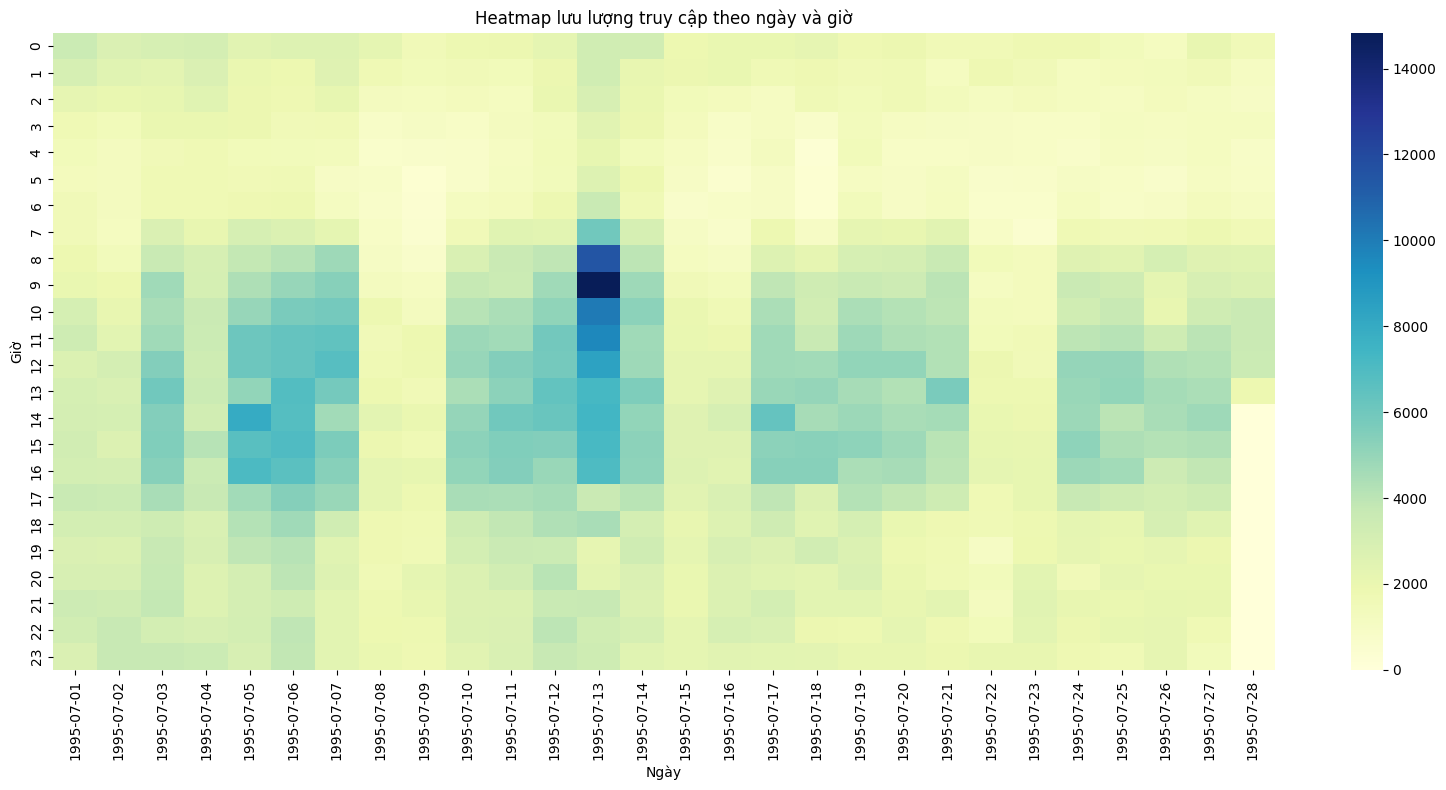

In [20]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# Nhóm theo ngày và giờ
heatmap_data = df.groupby(['date', 'hour']).size().unstack(fill_value=0)

# Vẽ heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu')
plt.title("Heatmap lưu lượng truy cập theo ngày và giờ")
plt.xlabel("Ngày")
plt.ylabel("Giờ")
plt.tight_layout()
plt.show()


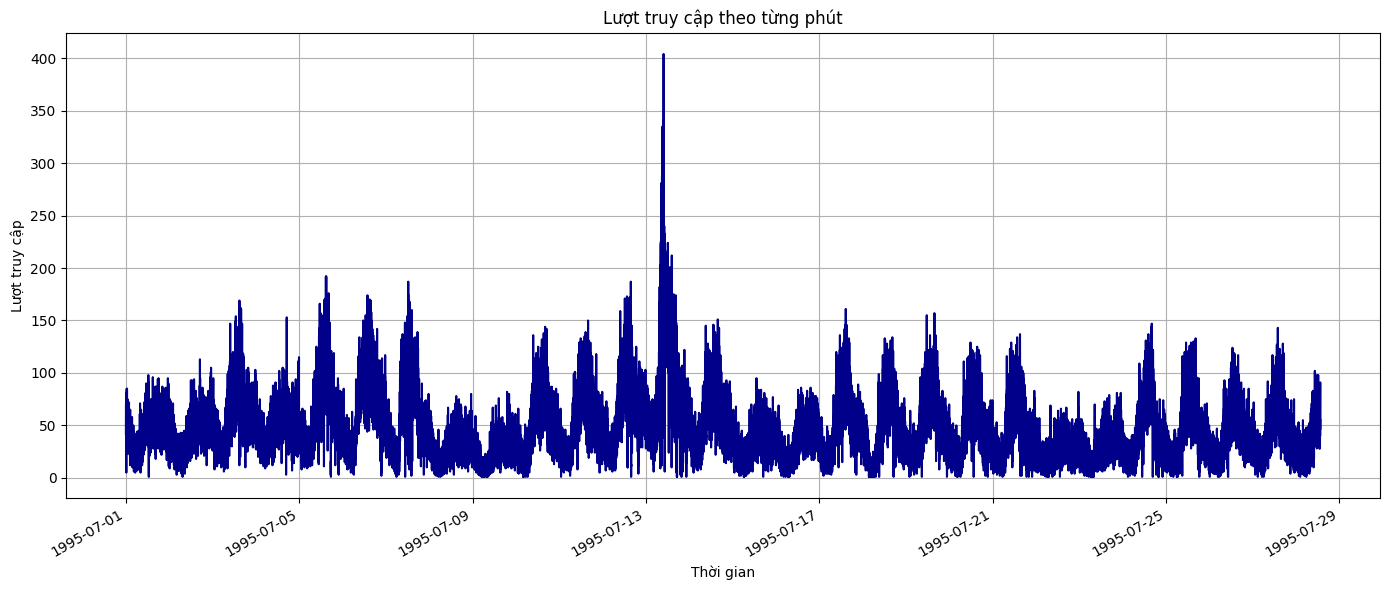

In [21]:
df['minute'] = df['timestamp'].dt.floor('min')
minute_hits = df.groupby('minute').size()

plt.figure(figsize=(14, 6))
minute_hits.plot(color='darkblue')
plt.title("Lượt truy cập theo từng phút")
plt.xlabel("Thời gian")
plt.ylabel("Lượt truy cập")
plt.grid(True)
plt.tight_layout()
plt.show()